<h1 align="center"> Superdense Coding </h1>

In [1]:
# Installing Libraries
!pip install qiskit pylatexenc --quiet
!pip install qiskit.ignis --quiet

In [9]:
# Importing Libraries
from qiskit import *
from qiskit.tools.monitor import  job_monitor
from qiskit.tools.visualization import plot_state_qsphere
from qiskit.visualization import plot_histogram, plot_bloch_multivector, array_to_latex

import numpy as np
from qiskit.extensions import Initialize
from qiskit.ignis.verification import marginal_counts
from qiskit.quantum_info import random_statevector

import warnings
warnings.filterwarnings('ignore')

### Create entangled pair with 2 qubits

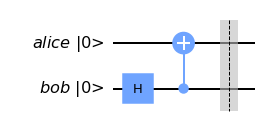

In [3]:
# Define Qubits
alice_qreg = QuantumRegister(1, name="alice")
bob_qreg = QuantumRegister(1, name="bob")

# Create Circuit
superdense_coding_circuit = QuantumCircuit(alice_qreg, bob_qreg)

# Apply Gates
superdense_coding_circuit.h(1)
superdense_coding_circuit.cx(1,0)

superdense_coding_circuit.barrier()
superdense_coding_circuit.draw(initial_state=True, output ='mpl')

### Message That Alice want to send:
- `00` --> Alice does Nothing
- `01` --> Alice applies X gate
- `10` --> Alice applies Z gate
- `11` --> Alice applies X and Z gate

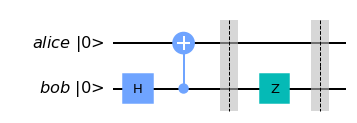

In [4]:
# Message to send
message = '10'

# Conditions
if message[1]=="1":
    superdense_coding_circuit.x(0)
if message[0]=="1":
    superdense_coding_circuit.z(1)
    
superdense_coding_circuit.barrier()
superdense_coding_circuit.draw(initial_state=True, output ='mpl')

### Bob decodes the message

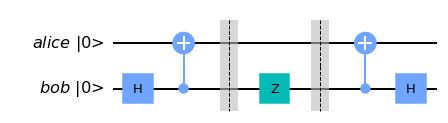

In [5]:
superdense_coding_circuit.cx(1,0)      # Bob applies cx gate
superdense_coding_circuit.h(1)         # Bob applies h gate
superdense_coding_circuit.draw(initial_state=True, output ='mpl')

### Apply Measurement

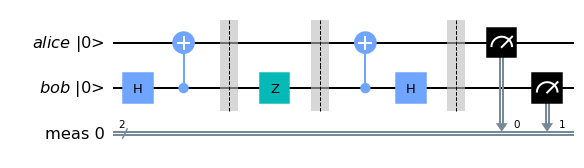

In [6]:
superdense_coding_circuit.measure_all()
superdense_coding_circuit.draw(initial_state=True, output ='mpl')

In [7]:
# Creating a copy of super dense coding circuit for later use
import copy
second_superdense_coding_circuit = copy.deepcopy(superdense_coding_circuit)

Job Status: job has successfully run


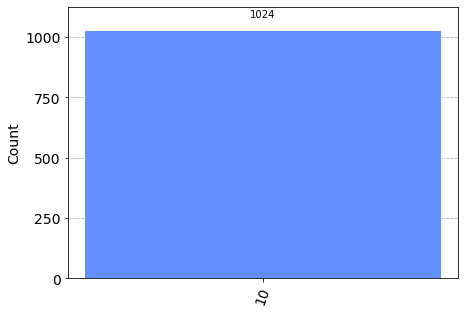

In [8]:
# Run on Simulator
simulator = Aer.get_backend('aer_simulator')     # Select Simulator
superdense_coding_circuit.save_statevector()                       # Save StateVector
qobj = assemble(superdense_coding_circuit)                         # Assemble
job = simulator.run(superdense_coding_circuit)                     # run the simulation
job_monitor(job)                                 # Monitor Job
result = job.result()                            # Get Result

# Simulated counts output
counts = result.get_counts()       # Get counts
plot_histogram(counts)             # plot counts